# Extra Random Tree

Extra Trees is an ensemble machine learning algorithm that combines the predictions from many decision trees. ... It can often achieve as-good or better performance than the random forest algorithm

The Extra Trees algorithm works by creating a large number of unpruned decision trees from the training dataset. Predictions are made by averaging the prediction of the decision trees in the case of regression or using majority voting in the case of classification.

Unlike bagging and random forest that develop each decision tree from a bootstrap sample of the training dataset, the Extra Trees algorithm fits each decision tree on the whole training dataset.

In [26]:
import sklearn
print(sklearn.__version__)

0.24.1


# Difference Between Random Forest and Extra Random Tree

Random forest uses bootstrap replicas, that is to say, it subsamples the input data with replacement, whereas Extra Trees use the whole original sample. 

# Extra Trees vs Random Forest

trees ensemble methods are better than simple decision trees

both algorithms have the same growing tree procedure. Moreover, when selecting the partition of each node, both of them randomly choose a subset of features.

So, the main two differences are the following:

Random forest uses bootstrap replicas, that is to say, it subsamples the input data with replacement, whereas Extra Trees use the whole original sample. In the Extra Trees sklearn implementation there is an optional parameter that allows users to bootstrap replicas, but by default, it uses the entire input sample. This may increase variance because bootstrapping makes it more diversified.

Another difference is the selection of cut points in order to split nodes. Random Forest chooses the optimum split while Extra Trees chooses it randomly. However, once the split points are selected, the two algorithms choose the best one between all the subset of features. Therefore, Extra Trees adds randomization but still has optimization.

In terms of computational cost, and therefore execution time, the Extra Trees algorithm is faster. This algorithm saves time because the whole procedure is the same, but it randomly chooses the split point and does not calculate the optimal one.

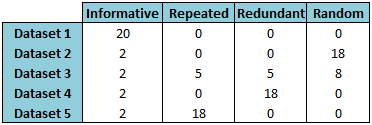

In [2]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\xtra.png')

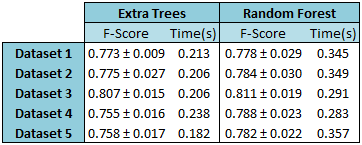

In [3]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\xtra1.png')

we can see that results barely vary for the two algorithms. It seems that the Random Forest gets better results, but the difference is very small. As mentioned above, the variance of the Extra Trees is lower, but again, the difference is practically insignificant. It is remarkable that results vary more for datasets 4 and 5 where most of the features are redundant or repeated.

Moreover, as expected, Extra Trees is much faster. This is because instead of looking for the optimal split at each node it does it randomly.

Extra Trees

The "Random" in Random Forest is bceause we are using a random subset of the dataset. But what if instead of choosing the best possible threshold for each tree at each node, we simply choose a random threshold too.

In [28]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [29]:
data = load_breast_cancer()

In [30]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [31]:
data_X = pd.DataFrame(data["data"], columns=data['feature_names'])
data_X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [35]:
data_Y = data["target"]
data_Y[30:]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [38]:
data_X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [37]:
data_Y.shape

(569,)

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score# Cross validation(Use for imporve model performance)

We will use 5-fold cross validation and take its average to compute the accuracy of model.

In [40]:
etc = ExtraTreesClassifier(random_state=0)
cv_score = cross_val_score(etc, data_X, data_Y, cv=5)
print("The avergae Cross validation score is ", cv_score)

The avergae Cross validation score is  [0.93859649 0.97368421 1.         0.96491228 0.97345133]


Hypertuning

Here are some of the popular tuning parameters provided by Scikit-Learn :-

n_estimators : The number of trees in a forest. Default = 100
    
max_depth : The maximum depth of the forest. Default = None i.e the tree will continue to expand untill all nodes are pure.
    
min_samples_split : The minimum number of samples required to split a node. Default = 2
    
min_samples_leaf : The minimum number of samples required to be at leaf node. This parameter becomes important specially if max_depth=None. Default = 1.
    

In [13]:
from sklearn.model_selection import GridSearchCV

In [43]:
parameters = {'n_estimators':[50, 100, 500, 1000], 'max_depth':[5, 10, 50, 100, 500],
             'min_samples_leaf':[1, 2, 3, 4, 5]}
etc = ExtraTreesClassifier()
clf = GridSearchCV(etc, parameters, cv=5)
clf.fit(data_X, data_Y)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': [5, 10, 50, 100, 500],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [50, 100, 500, 1000]})

In [46]:
clf.best_estimator_

ExtraTreesClassifier(max_depth=50, n_estimators=50)

In [47]:
clf.best_score_

0.9701288619779536

# Comparison

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
import time

In [ ]:
# Computation

In [23]:
start_time = time.time()

dtc = DecisionTreeClassifier(random_state=0)
cv_score = cross_val_score(dtc, data_X, data_Y, cv=5).mean()
print("Average Cross Validation Score = ", cv_score)
print("--- %s seconds ---" % (time.time() - start_time))

Average Cross Validation Score =  0.9173730787144851
--- 0.050744056701660156 seconds ---


In [24]:
start_time = time.time()

rfc = RandomForestClassifier(random_state=0)
cv_score = cross_val_score(rfc, data_X, data_Y, cv=5).mean()
print("Average Cross Validation Score = ", cv_score)
print("--- %s seconds ---" % (time.time() - start_time))

Average Cross Validation Score =  0.9631113181183046
--- 0.5907700061798096 seconds ---


In [25]:
start_time = time.time()

etc = ExtraTreesClassifier(random_state=0)
cv_score = cross_val_score(etc, data_X, data_Y, cv=5).mean()
print("Average Cross Validation Score = ", cv_score)
print("--- %s seconds ---" % (time.time() - start_time))

Average Cross Validation Score =  0.9701288619779538
--- 0.45991039276123047 seconds ---


In [ ]:
# Low Bias(Error) and low variance
# Generalized model

In [ ]:
# Overfitting
# Low Bias and High Variance

In [ ]:
# Underfitting
# High Bias and Low Variance

In [ ]:
# XGBOOST, Ada Boost

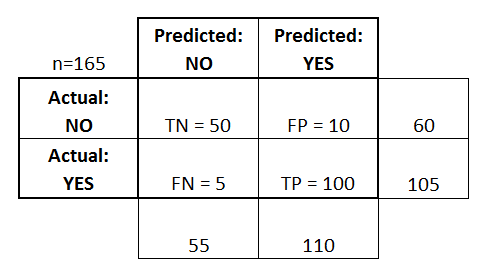

In [52]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\confusion_matrix2.png')